
## Can we predict the price?


<ul>
<li><a href="#intro">Introduction.</a></li>
<li><a href="#dp">Data Preparation</a></li>
<li><a href="#q1">Price Prediction</a></li>
</ul>

<a id='intro'></a>
# Introduction

Hi All!
Welcome to the third part of your analysis!

Today we are going to take a look at "Boston Airbnb Open Data". The data has been downloaded from Kaggle.com, "Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Boston, MA". The dataset has three parts:

1. Listings, including full descriptions and average review score
2. Reviews, including a unique id for each reviewer and detailed comments
3. Calendar, including listing id and the price and availability for that day

For our analysis, we are going to use Listings dataset. The project contains three notebooks, and each one of them exploring different questions:

1. The 1st notebook is about the hosts, trying to answer the questions above
2. In the 2nd will explore the price, and how is affected by location, property type, room type and bed type
3. And in the last notebook, we will try to build a model so we can predict the price.


In this notebook, we will try to predict the price.

<a id='dp'></a>
# Data Preparation

In [228]:
# Import libraries
import numpy as np
from numpy import arange
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

In [229]:
# Read csv to pandas
listings = pd.read_csv('./listings.csv')
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [230]:
# Shape of the dataframe
listings.shape

(3585, 95)

In [231]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

The data frame consists of 3585 rows and 95 columns. Here we will decide which columns we are going to use for our analysis, because as you can see there are columns with no values, with very little values,  with URL and of course the columns that are out of interest. Because we are trying to predict value with supervised learning technique it will be more helpful to work with quantitative variables.

In [232]:
# Create new dataframe with the columns we are keeping 
listings_predict_price = listings[['host_response_rate', 'host_acceptance_rate', 'calculated_host_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'guests_included', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'reviews_per_month']]
listings_predict_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_response_rate              3114 non-null   object 
 1   host_acceptance_rate            3114 non-null   object 
 2   calculated_host_listings_count  3585 non-null   int64  
 3   accommodates                    3585 non-null   int64  
 4   bathrooms                       3571 non-null   float64
 5   bedrooms                        3575 non-null   float64
 6   beds                            3576 non-null   float64
 7   price                           3585 non-null   object 
 8   guests_included                 3585 non-null   int64  
 9   minimum_nights                  3585 non-null   int64  
 10  maximum_nights                  3585 non-null   int64  
 11  availability_30                 3585 non-null   int64  
 12  availability_60                 35

Now we have 25 columns but there are some columns with object type but we need them as a number: host_response_rate, host_acceptance_rate, price. Let's see and change the type of columns.

In [233]:
listings_predict_price['price'].value_counts()

$150.00    144
$200.00    117
$100.00    101
$250.00     95
$75.00      94
          ... 
$380.00      1
$156.00      1
$464.00      1
$800.00      1
$385.00      1
Name: price, Length: 324, dtype: int64

In [234]:
listings_predict_price['host_acceptance_rate'].value_counts()

100%    1210
55%      139
91%      115
94%      113
98%       97
        ... 
48%        1
44%        1
47%        1
53%        1
18%        1
Name: host_acceptance_rate, Length: 72, dtype: int64

In [235]:
listings_predict_price['host_response_rate'].value_counts()

100%    2072
98%      195
90%      106
96%       90
89%       87
71%       62
99%       52
92%       38
80%       38
97%       36
94%       28
70%       23
95%       22
50%       21
93%       18
79%       18
77%       17
91%       17
73%       16
67%       15
60%       15
75%       14
0%        13
86%       11
78%       10
83%       10
81%        8
69%        7
85%        7
88%        6
33%        6
40%        5
36%        3
30%        3
82%        3
10%        2
14%        2
31%        2
61%        2
84%        2
25%        1
57%        1
38%        1
68%        1
64%        1
6%         1
20%        1
63%        1
19%        1
43%        1
17%        1
56%        1
Name: host_response_rate, dtype: int64

We can see symbols on these column we need to clean them as well.

In [236]:
# Clean price column from symbols and change the dtype
listings_predict_price = listings_predict_price.copy()
listings_predict_price['price'] = listings_predict_price['price'].map(lambda x: x.lstrip('$').rstrip('00'))
listings_predict_price['price'] = listings_predict_price['price'].str.replace(',', '').str.replace('.', '')
listings_predict_price['price'] = listings_predict_price['price'].astype(float)
listings_predict_price['price'].value_counts()

150.0    144
200.0    117
100.0    101
250.0     95
75.0      94
        ... 
241.0      1
211.0      1
132.0      1
599.0      1
999.0      1
Name: price, Length: 324, dtype: int64

In [237]:
# Clean host_response_rate column from symbols and change the dtype
listings_predict_price = listings_predict_price.copy()
listings_predict_price['host_response_rate'] = listings_predict_price['host_response_rate'].str.replace('%', '')
listings_predict_price['host_response_rate'] = listings_predict_price['host_response_rate'].astype(float)
listings_predict_price['host_response_rate'].value_counts()

100.0    2072
98.0      195
90.0      106
96.0       90
89.0       87
71.0       62
99.0       52
80.0       38
92.0       38
97.0       36
94.0       28
70.0       23
95.0       22
50.0       21
93.0       18
79.0       18
91.0       17
77.0       17
73.0       16
60.0       15
67.0       15
75.0       14
0.0        13
86.0       11
78.0       10
83.0       10
81.0        8
69.0        7
85.0        7
88.0        6
33.0        6
40.0        5
36.0        3
30.0        3
82.0        3
61.0        2
14.0        2
31.0        2
84.0        2
10.0        2
25.0        1
57.0        1
43.0        1
63.0        1
20.0        1
56.0        1
68.0        1
17.0        1
38.0        1
64.0        1
19.0        1
6.0         1
Name: host_response_rate, dtype: int64

In [238]:
# Clean host_acceptance_rate column from symbols and change the dtype
listings_predict_price = listings_predict_price.copy()
listings_predict_price['host_acceptance_rate'] = listings_predict_price['host_acceptance_rate'].str.replace('%', '')
listings_predict_price['host_acceptance_rate'] = listings_predict_price['host_acceptance_rate'].astype(float)
listings_predict_price['host_acceptance_rate'].value_counts()

100.0    1210
55.0      139
91.0      115
94.0      113
98.0       97
         ... 
18.0        1
47.0        1
59.0        1
53.0        1
44.0        1
Name: host_acceptance_rate, Length: 72, dtype: int64

In [239]:
listings_predict_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_response_rate              3114 non-null   float64
 1   host_acceptance_rate            3114 non-null   float64
 2   calculated_host_listings_count  3585 non-null   int64  
 3   accommodates                    3585 non-null   int64  
 4   bathrooms                       3571 non-null   float64
 5   bedrooms                        3575 non-null   float64
 6   beds                            3576 non-null   float64
 7   price                           3585 non-null   float64
 8   guests_included                 3585 non-null   int64  
 9   minimum_nights                  3585 non-null   int64  
 10  maximum_nights                  3585 non-null   int64  
 11  availability_30                 3585 non-null   int64  
 12  availability_60                 35

<a id='q1'></a>
# Price Prediction

In [240]:
# Replace all n/a valus with median, instead of dropping them
for col in listings_predict_price.columns[listings_predict_price.isnull().any()]:
    listings_predict_price[col] = listings_predict_price[col].fillna(listings_predict_price[col].median())

In [241]:
# Descriptive statistics
listings_predict_price.describe()

,host_response_rate,host_acceptance_rate,calculated_host_listings_count,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,3585.00000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3.585000e+03,3585.00000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000
mean,95.64742,85.464156,12.733891,3.041283,1.220781,1.255230,1.607531,173.925802,1.429847,3.171269,2.872584e+04,8.64993,21.833194,38.558159,179.346444,19.044630,92.389121,9.562064,9.427336,9.727197,9.727197,9.548396,9.129707,12.733891,1.802014
std,11.78841,20.567531,29.415076,1.778929,0.500698,0.752129,1.010933,148.331321,1.056787,8.874133,1.670136e+06,10.43533,21.860966,33.158272,142.136180,35.571658,8.426451,0.852131,1.073125,0.686118,0.662954,0.830476,0.890595,29.415076,1.911809
min,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,10.000000,0.000000,1.000000,1.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.010000
25%,98.00000,79.000000,1.000000,2.000000,1.000000,1.000000,1.000000,85.000000,1.000000,1.000000,3.650000e+02,0.00000,0.000000,0.000000,19.000000,1.000000,91.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.640000
50%,100.00000,94.000000,2.000000,2.000000,1.000000,1.000000,1.000000,150.000000,1.000000,2.000000,1.125000e+03,4.00000,16.000000,37.000000,179.000000,5.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.170000
75%,100.00000,100.000000,6.000000,4.000000,1.000000,2.000000,2.000000,220.000000,1.000000,3.000000,1.125000e+03,15.00000,40.000000,68.000000,325.000000,21.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,6.000000,2.130000
max,100.00000,100.000000,136.000000,16.000000,6.000000,5.000000,16.000000,4000.000000,14.000000,300.000000,1.000000e+08,30.00000,60.000000,90.000000,365.000000,404.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,136.000000,19.150000


In [242]:
# Correlation table
listings_predict_price.corr()

,host_response_rate,host_acceptance_rate,calculated_host_listings_count,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
host_response_rate,1.000000,0.027993,-0.044637,0.026307,0.013003,-0.009075,0.018307,0.001229,0.051498,-0.028105,0.006169,-0.088114,-0.068709,-0.056748,-0.033927,0.099759,0.047588,0.022928,0.030573,0.036021,0.050239,0.006731,0.038269,-0.044637,0.096614
host_acceptance_rate,0.027993,1.000000,-0.390477,-0.096259,-0.097535,-0.084406,-0.027428,-0.105804,0.054913,-0.017251,0.011795,-0.309741,-0.269700,-0.236624,-0.123138,0.170542,0.016598,0.042598,-0.014981,0.055301,0.072683,-0.078123,0.081024,-0.390477,0.267700
calculated_host_listings_count,-0.044637,-0.390477,1.000000,0.153344,0.165550,0.098465,0.026606,0.161855,-0.104020,0.067150,-0.003788,0.454879,0.416057,0.382327,0.077176,-0.138225,-0.083346,-0.084408,0.032075,-0.120585,-0.148220,0.052040,-0.172151,1.000000,-0.170117
accommodates,0.026307,-0.096259,0.153344,1.000000,0.347188,0.724918,0.815480,0.437756,0.495327,-0.038236,-0.009754,0.119488,0.099504,0.095363,0.056993,-0.001810,0.030701,0.006960,0.072897,-0.016831,-0.011031,0.000725,-0.004085,0.153344,0.009476
bathrooms,0.013003,-0.097535,0.165550,0.347188,1.000000,0.431197,0.348455,0.248554,0.111409,0.021567,-0.007357,0.115244,0.107050,0.089563,0.051651,-0.027193,0.005721,-0.007438,0.030255,-0.039453,-0.031165,-0.015470,-0.011365,0.165550,-0.044993
bedrooms,-0.009075,-0.084406,0.098465,0.724918,0.431197,1.000000,0.710839,0.384895,0.396562,-0.004921,-0.005658,0.097061,0.075135,0.058225,0.027606,-0.042590,0.050714,0.024254,0.067060,0.012228,0.017691,-0.036532,0.020543,0.098465,-0.056199
beds,0.018307,-0.027428,0.026606,0.815480,0.348455,0.710839,1.000000,0.370671,0.477625,-0.020124,-0.010025,0.082241,0.066539,0.063987,0.056298,-0.008436,0.028938,0.000267,0.047905,-0.007174,0.002567,-0.020408,0.002943,0.026606,0.003356
price,0.001229,-0.105804,0.161855,0.437756,0.248554,0.384895,0.370671,1.000000,0.211806,0.020054,-0.005498,0.132100,0.112577,0.098526,0.036694,-0.096427,0.079709,0.051459,0.120223,0.017051,0.022646,0.150576,0.000721,0.161855,-0.121363
guests_included,0.051498,0.054913,-0.104020,0.495327,0.111409,0.396562,0.477625,0.211806,1.000000,-0.029542,-0.006805,-0.008894,0.002875,0.027438,0.071025,0.064606,0.033726,0.024434,0.015863,-0.005237,0.042769,-0.018782,0.023456,-0.104020,0.057291
minimum_nights,-0.028105,-0.017251,0.067150,-0.038236,0.021567,-0.004921,-0.020124,0.020054,-0.029542,1.000000,-0.004101,0.051851,0.040637,0.030873,0.021936,-0.062465,-0.021757,-0.012955,-0.010442,-0.031642,-0.014963,-0.013959,-0.020676,0.067150,-0.099124


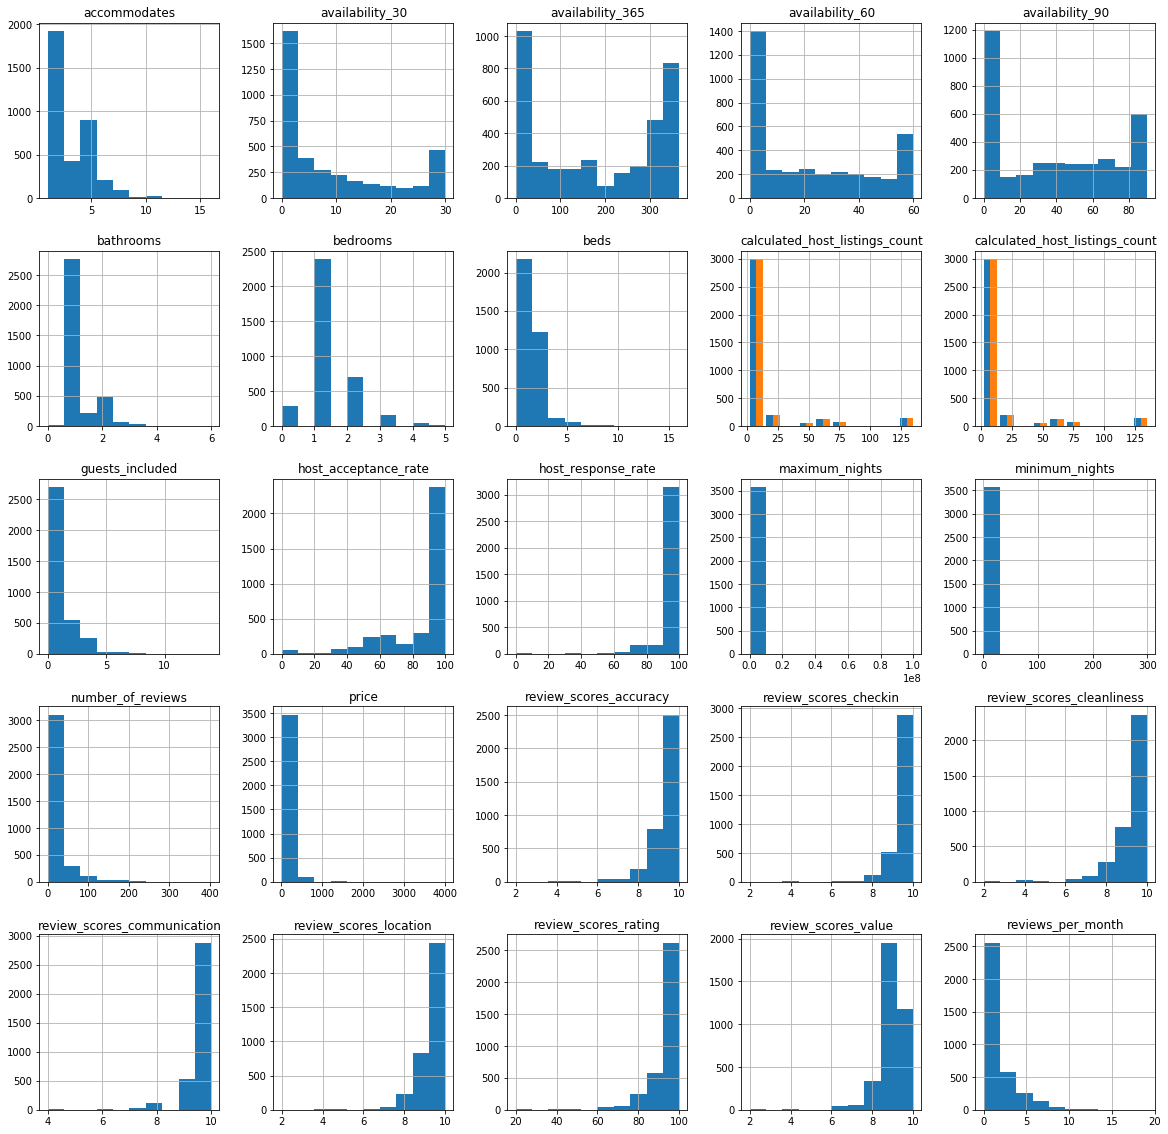

In [243]:
# Create histograms
listings_predict_price.hist(figsize=(20,20));
plt.savefig(r'C:\Users\nik\Boston_AirBnB\Charts\10.png', dpi=300)

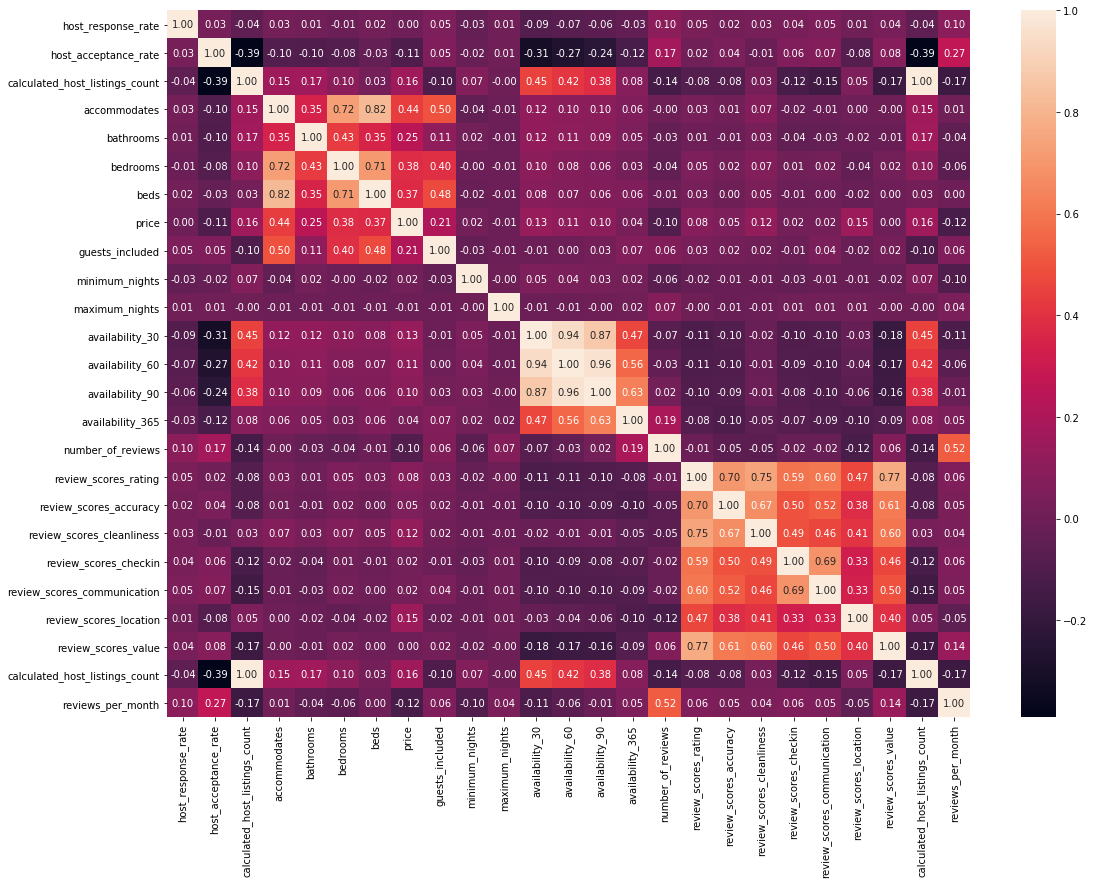

In [244]:
# Create the heatmap
fig, ax = plt.subplots(figsize=(18,13))
sns.heatmap(listings_predict_price.corr(), annot=True, fmt=".2f", ax=ax);
plt.savefig(r'C:\Users\nik\Boston_AirBnB\Charts\11.png', dpi=300)

From the heatmap, the main interest is on the price column, we want to see the correlation between price and the other columns. We are going to choose the six with the highest positive correlation, and start the predicting model.

In [245]:
X = listings_predict_price[['calculated_host_listings_count', 'accommodates', 'bedrooms', 'beds', 'bathrooms', 'guests_included']]
y = listings_predict_price['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .35, random_state=40)

lm_model = LinearRegression(normalize=True) 
lm_model.fit(X_train, y_train)

        
y_test_preds = lm_model.predict(X_test)# We can then use our fitted model to predict the salary for each
                                        #listing in our test set, and see how well these predictions
                                        #match the truth.

print(r2_score(y_test, y_test_preds)) #In this case we are predicting a continuous, numeric response.  Therefore, common
print(mean_squared_error(y_test, y_test_preds)) #metrics to assess fit include Rsquared and MSE.

0.18034199045840793
19658.984435422713


We built a model that predicts, but there is room for improvement!
This suggests that 18% of the variability in price can be explained by the selected variables.
Let's try to add some more variables to our model: 'review_scores_cleanliness', 'review_scores_location', 'calculated_host_listings_count', 'availability_30', 'availability_60', 'availability_90.

In [246]:
X = listings_predict_price[['calculated_host_listings_count', 'accommodates', 'bedrooms', 'beds', 'bathrooms', 'guests_included', 'review_scores_cleanliness', 'review_scores_location', 'calculated_host_listings_count', 'availability_30', 'availability_60', 'availability_90']]
y = listings_predict_price['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .35, random_state=40)

lm_model = LinearRegression(normalize=True) 
lm_model.fit(X_train, y_train) #

        
y_test_preds = lm_model.predict(X_test)# We can then use our fitted model to predict the salary for each
                                        #listing in our test set, and see how well these predictions
                                        #match the truth.

print(r2_score(y_test, y_test_preds)) #In this case we are predicting a continuous, numeric response.  Therefore, common
print(mean_squared_error(y_test, y_test_preds)) #metrics to assess fit include Rsquared and MSE.

0.20592035600956937
19045.503344040393


We got a little improvement. Let's see where our predictions stand. And then will remove the outliers from the price and test the model again.

In [247]:
# A look at our prediction
preds_vs_act = pd.DataFrame(np.hstack([y_test.values.reshape(y_test.size,1), y_test_preds.reshape(y_test.size,1)]))
preds_vs_act.columns = ['actual', 'preds']
preds_vs_act['diff'] = preds_vs_act['actual'] - preds_vs_act['preds']
preds_vs_act.head()

,actual,preds,diff
0,310.0,155.888089,154.111911
1,100.0,137.825268,-37.825268
2,232.0,151.624573,80.375427
3,289.0,211.318132,77.681868
4,130.0,161.947520,-31.947520


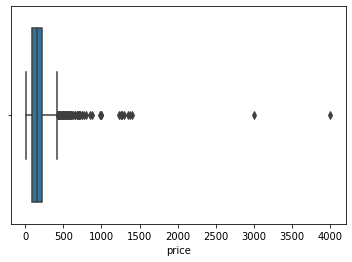

In [248]:
listings_predict_price
sns.boxplot(x=listings_predict_price['price'])
plt.savefig(r'C:\Users\nik\Boston_AirBnB\Charts\12.png', dpi=300)

In [249]:
# Remove outliers on price and see the prediction
listings_predict_price = listings_predict_price.loc[(listings_predict_price.price <= 500) & (listings_predict_price.price > 0)]

In [250]:
X = listings_predict_price[['calculated_host_listings_count', 'accommodates', 'bedrooms', 'beds', 'bathrooms', 'guests_included', 'review_scores_cleanliness', 'review_scores_location', 'calculated_host_listings_count', 'availability_30', 'availability_60', 'availability_90']]
y = listings_predict_price['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .35, random_state=40)

lm_model = LinearRegression(normalize=True) 
lm_model.fit(X_train, y_train) 

        
y_test_preds = lm_model.predict(X_test) # We can then use our fitted model to predict the salary for each
                                        #listing in our test set, and see how well these predictions
                                        #match the truth

print(r2_score(y_test, y_test_preds)) #In this case we are predicting a continuous, numeric response.  Therefore, common
print(mean_squared_error(y_test, y_test_preds)) #metrics to assess fit include Rsquared and MSE.

0.43025299227885083
4886.733033644556


Now that is an improvement. The R-squared almost doubled and the mean squared error has dropped significantly.

In [251]:
# A look at our prediction
preds_vs_act = pd.DataFrame(np.hstack([y_test.values.reshape(y_test.size,1), y_test_preds.reshape(y_test.size,1)]))
preds_vs_act.columns = ['actual', 'preds']
preds_vs_act['diff'] = preds_vs_act['actual'] - preds_vs_act['preds']
preds_vs_act.head()

,actual,preds,diff
0,257.0,180.435786,76.564214
1,75.0,133.629548,-58.629548
2,128.0,120.366059,7.633941
3,319.0,310.836120,8.163880
4,249.0,197.739968,51.260032


We are going to test it further and we will add some categorical variables like:'host_is_superhost', 'room_type', 'bed_type'.
Will blindly encode the above categorical variables as dummy variables in our model. 

In [252]:
# Create new dataframe with the added columns we are keeping 
listings_predict_price1 = listings[['host_response_rate', 'host_acceptance_rate', 'calculated_host_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'guests_included', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'reviews_per_month', 'host_is_superhost', 'room_type', 'bed_type']]
listings_predict_price1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_response_rate              3114 non-null   object 
 1   host_acceptance_rate            3114 non-null   object 
 2   calculated_host_listings_count  3585 non-null   int64  
 3   accommodates                    3585 non-null   int64  
 4   bathrooms                       3571 non-null   float64
 5   bedrooms                        3575 non-null   float64
 6   beds                            3576 non-null   float64
 7   price                           3585 non-null   object 
 8   guests_included                 3585 non-null   int64  
 9   minimum_nights                  3585 non-null   int64  
 10  maximum_nights                  3585 non-null   int64  
 11  availability_30                 3585 non-null   int64  
 12  availability_60                 35

In [253]:
# Clean host_acceptance_rate column from symbols and change the dtype
listings_predict_price1 = listings_predict_price1.copy()
listings_predict_price1['host_acceptance_rate'] = listings_predict_price1['host_acceptance_rate'].str.replace('%', '')
listings_predict_price1['host_acceptance_rate'] = listings_predict_price1['host_acceptance_rate'].astype(float)

In [254]:
# Clean host_response_rate column from symbols and change the dtype
listings_predict_price1 = listings_predict_price1.copy()
listings_predict_price1['host_response_rate'] = listings_predict_price1['host_response_rate'].str.replace('%', '')
listings_predict_price1['host_response_rate'] = listings_predict_price1['host_response_rate'].astype(float)

In [255]:
# Clean price column from symbols and change the dtype
listings_predict_price1 = listings_predict_price1.copy()
listings_predict_price1['price'] = listings_predict_price1['price'].map(lambda x: x.lstrip('$').rstrip('00'))
listings_predict_price1['price'] = listings_predict_price1['price'].str.replace(',', '').str.replace('.', '')
listings_predict_price1['price'] = listings_predict_price1['price'].astype(float)

In [256]:
# Create the dataframe and count the categorical variables
cat_vars_int = listings_predict_price1.select_dtypes(include=['object']).copy().columns
len(cat_vars_int)

3

In [257]:
# Dummy code categorical variables using pandas
for var in  cat_vars_int:
    # for each cat add dummy var, drop original column
    listings_predict_price1 = pd.concat([listings_predict_price1.drop(var, axis=1), pd.get_dummies(listings_predict_price1[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)

In [258]:
# Replace all n/a valus with median, instead of dropping them
for col in listings_predict_price1.columns[listings_predict_price1.isnull().any()]:
    listings_predict_price1[col] = listings_predict_price1[col].fillna(listings_predict_price1[col].median())

In [259]:
listings_predict_price1.describe()

,host_response_rate,host_acceptance_rate,calculated_host_listings_count,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,host_is_superhost_t,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
count,3585.00000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3.585000e+03,3585.00000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000
mean,95.64742,85.464156,12.733891,3.041283,1.220781,1.255230,1.607531,173.925802,1.429847,3.171269,2.872584e+04,8.64993,21.833194,38.558159,179.346444,19.044630,92.389121,9.562064,9.427336,9.727197,9.727197,9.548396,9.129707,12.733891,1.802014,0.113529,0.384379,0.022315,0.002789,0.014226,0.008647,0.963180
std,11.78841,20.567531,29.415076,1.778929,0.500698,0.752129,1.010933,148.331321,1.056787,8.874133,1.670136e+06,10.43533,21.860966,33.158272,142.136180,35.571658,8.426451,0.852131,1.073125,0.686118,0.662954,0.830476,0.890595,29.415076,1.911809,0.317282,0.486516,0.147727,0.052748,0.118438,0.092600,0.188346
min,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,10.000000,0.000000,1.000000,1.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,98.00000,79.000000,1.000000,2.000000,1.000000,1.000000,1.000000,85.000000,1.000000,1.000000,3.650000e+02,0.00000,0.000000,0.000000,19.000000,1.000000,91.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.640000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,100.00000,94.000000,2.000000,2.000000,1.000000,1.000000,1.000000,150.000000,1.000000,2.000000,1.125000e+03,4.00000,16.000000,37.000000,179.000000,5.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,100.00000,100.000000,6.000000,4.000000,1.000000,2.000000,2.000000,220.000000,1.000000,3.000000,1.125000e+03,15.00000,40.000000,68.000000,325.000000,21.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,6.000000,2.130000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,100.00000,100.000000,136.000000,16.000000,6.000000,5.000000,16.000000,4000.000000,14.000000,300.000000,1.000000e+08,30.00000,60.000000,90.000000,365.000000,404.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,136.000000,19.150000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [260]:
listings_predict_price1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_response_rate              3585 non-null   float64
 1   host_acceptance_rate            3585 non-null   float64
 2   calculated_host_listings_count  3585 non-null   int64  
 3   accommodates                    3585 non-null   int64  
 4   bathrooms                       3585 non-null   float64
 5   bedrooms                        3585 non-null   float64
 6   beds                            3585 non-null   float64
 7   price                           3585 non-null   float64
 8   guests_included                 3585 non-null   int64  
 9   minimum_nights                  3585 non-null   int64  
 10  maximum_nights                  3585 non-null   int64  
 11  availability_30                 3585 non-null   int64  
 12  availability_60                 35

In [261]:
# Remove outliers from price column
listings_predict_price1 = listings_predict_price1.loc[(listings_predict_price1.price <= 500) & (listings_predict_price1.price > 0)]

In [262]:
# Add the categorical variable to our test and run it
X = listings_predict_price1[['calculated_host_listings_count', 'accommodates', 'bedrooms', 'beds', 'bathrooms', 'guests_included', 'review_scores_cleanliness', 'review_scores_location', 'calculated_host_listings_count', 'availability_30', 'availability_60', 'availability_90', 'host_is_superhost_t', 'room_type_Private room', 'room_type_Shared room', 'bed_type_Couch', 'bed_type_Futon', 'bed_type_Pull-out Sofa', 'bed_type_Real Bed']]
y = listings_predict_price1['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .35, random_state=40)

lm_model = LinearRegression(normalize=True) 
lm_model.fit(X_train, y_train) 

        
y_test_preds = lm_model.predict(X_test) # We can then use our fitted model to predict the salary for each
                                        #listing in our test set, and see how well these predictions
                                        #match the truth

print(r2_score(y_test, y_test_preds)) #In this case we are predicting a continuous, numeric response.  Therefore, common
print(mean_squared_error(y_test, y_test_preds)) #metrics to assess fit include Rsquared and MSE.

0.5207635184689086
4110.422193514648


In [263]:
# A look at our prediction
preds_vs_act = pd.DataFrame(np.hstack([y_test.values.reshape(y_test.size,1), y_test_preds.reshape(y_test.size,1)]))
preds_vs_act.columns = ['actual', 'preds']
preds_vs_act['diff'] = preds_vs_act['actual'] - preds_vs_act['preds']
preds_vs_act.head()

,actual,preds,diff
0,257.0,203.250262,53.749738
1,75.0,93.207111,-18.207111
2,128.0,89.798329,38.201671
3,319.0,284.424524,34.575476
4,249.0,226.192724,22.807276


We are at the point where our model explains half of the variability of the response data around its mean. we can fit our data better to our model? The model explains the 52.2% of the variability in listing price. Price is very difficult to model, and we didn't have enough correlation in the features. If we add some more features the model probably will deliver better results.    